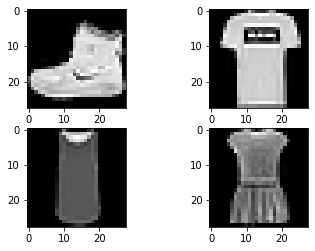

Epoch 1/10
300/300 - 10s - loss: 0.5096 - accuracy: 0.8229 - val_loss: 0.4212 - val_accuracy: 0.8535 - 10s/epoch - 33ms/step
Epoch 2/10
300/300 - 5s - loss: 0.3757 - accuracy: 0.8655 - val_loss: 0.4126 - val_accuracy: 0.8480 - 5s/epoch - 15ms/step
Epoch 3/10
300/300 - 5s - loss: 0.3301 - accuracy: 0.8811 - val_loss: 0.3719 - val_accuracy: 0.8637 - 5s/epoch - 15ms/step
Epoch 4/10
300/300 - 4s - loss: 0.3035 - accuracy: 0.8898 - val_loss: 0.3467 - val_accuracy: 0.8761 - 4s/epoch - 15ms/step
Epoch 5/10
300/300 - 5s - loss: 0.2852 - accuracy: 0.8962 - val_loss: 0.3344 - val_accuracy: 0.8774 - 5s/epoch - 15ms/step
Epoch 6/10
300/300 - 5s - loss: 0.2717 - accuracy: 0.9005 - val_loss: 0.3281 - val_accuracy: 0.8841 - 5s/epoch - 15ms/step
Epoch 7/10
300/300 - 5s - loss: 0.2550 - accuracy: 0.9062 - val_loss: 0.3184 - val_accuracy: 0.8855 - 5s/epoch - 15ms/step
Epoch 8/10
300/300 - 5s - loss: 0.2419 - accuracy: 0.9111 - val_loss: 0.3155 - val_accuracy: 0.8889 - 5s/epoch - 15ms/step
Epoch 9/10
300

In [1]:
"""

HW-03 - Aditya-Pradip-Kulkarni

Date : 10/07/2022

"""
# Plot ad hoc mnist instances
from keras.datasets import mnist
import matplotlib.pyplot as plt
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
#from tensorflow.keras.datasets import fashion_mnist
import numpy as np

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# load data
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()


# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]


# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))
